In [2]:
import os
import pandas as pd
import numpy as np

output_file_path = "./dataset/combined_valeurs.txt"

combined_df = pd.read_csv(output_file_path, delimiter='\t', header=None, engine='python')

combined_df['positive_max'] = combined_df.loc[:, 19:138].apply(lambda x: x[x >= 0].max(), axis=1)
combined_df['negative_max'] = combined_df.loc[:, 19:138].apply(lambda x: x[x <= 0].min(), axis=1)
combined_df.rename(columns={0: "Date", 8: "velocity", 3: "Cycle_Number", 140: "experiment_number", 141: "position"}, inplace=True)

# Map 'position' column
combined_df['position'] = combined_df['position'].map({'Right': 0, 'Left': 1})
combined_df.drop(columns=['Date'], inplace=True)
experiment_numbers = [2, 3, 6, 7]

# Creating separate DataFrames for each experiment number
experiment_dfs = {num: combined_df[combined_df['experiment_number'] == num] for num in experiment_numbers}
table_2 = experiment_dfs[2].reset_index(drop=True)
table_3 = experiment_dfs[3].reset_index(drop=True)
table_6 = experiment_dfs[6].reset_index(drop=True)
table_7 = experiment_dfs[7].reset_index(drop=True)
table_2['id'] = range(len(table_2))
table_3['id'] = range(len(table_3))
table_6['id'] = range(len(table_6))
table_7['id'] = range(len(table_7))
tables = [table_2, table_3, table_6, table_7]
combined_df = pd.concat(tables)


# Compute mean for the group
final_df = combined_df.groupby(['id', 'velocity']).mean().reset_index()

# Rename 'velocity_group' back to 'velocity' for clarity
# final_df.rename(columns={'velocity_group': 'velocity'}, inplace=True)
final_df = final_df[final_df['velocity'] != 400.0]
final_df = final_df.groupby(['velocity', 'Cycle_Number'], as_index=False).mean()


C:\Users\alira\AppData\Local\Temp\ipykernel_31488\3354933705.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df = final_df.groupby(['velocity', 'Cycle_Number'], as_index=False).mean()
C:\Users\alira\AppData\Local\Temp\ipykernel_31488\3354933705.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_df = final_df.groupby(['velocity', 'Cycle_Number'], as_index=False).mean()


In [3]:
final_df


,velocity,Cycle_Number,id,1,2,4,5,6,7,9,...,134,135,136,137,138,139,experiment_number,position,positive_max,negative_max
0,160.0,1772.25,80.5,300.65650,0.0,3.0,4.5,1.0,1.0,4.116579,...,0.048828,-0.018311,3.051662e-03,0.036621,-0.033569,NaN,4.5,0.5,1.150514,-1.901244
1,160.0,3009.75,81.5,601.11325,0.0,3.0,4.5,1.0,1.0,4.116579,...,-0.006104,0.048828,6.713869e-02,0.051880,0.027466,NaN,4.5,0.5,1.354982,-1.931764
2,160.0,4246.75,82.5,901.65225,0.0,3.0,4.5,1.0,1.0,4.116579,...,0.051880,0.006104,5.000000e-08,0.051880,-0.012207,NaN,4.5,0.5,1.211550,-1.242066
3,160.0,5483.50,83.5,1202.14075,0.0,3.0,4.5,1.0,1.0,4.116579,...,-0.045776,-0.018310,1.220712e-02,0.000000,0.073242,NaN,4.5,0.5,1.144410,-1.376344
4,160.0,6721.00,84.5,1502.75775,0.0,3.0,4.5,1.0,1.0,4.116579,...,0.067139,0.021362,1.129150e-01,0.097656,0.103760,NaN,4.5,0.5,1.202395,-1.400756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,380.0,188809.50,1157.0,19230.41400,0.0,3.0,4.5,1.0,1.0,9.776876,...,0.201417,0.976561,2.056884e+00,2.258303,2.093505,NaN,6.5,0.5,8.648687,-12.658663
594,380.0,191746.00,1158.0,19530.91400,0.0,3.0,4.5,1.0,1.0,9.776876,...,0.079345,1.025391,2.026366e+00,2.191162,2.319335,NaN,6.5,0.5,8.746323,-12.957760
595,380.0,194684.50,1159.0,19831.52350,0.0,3.0,4.5,1.0,1.0,9.776876,...,-0.115965,0.970458,2.209474e+00,2.642822,2.478029,NaN,6.5,0.5,8.477785,-13.079812
596,380.0,197626.00,1160.0,20132.34350,0.0,3.0,4.5,1.0,1.0,9.776876,...,-0.262450,0.878907,1.776123e+00,1.879882,2.008056,NaN,6.5,0.5,7.641602,-11.700432


In [4]:
def create_tables_by_velocity_position(df):
    tables = {}
    unique_velocities = df['velocity'].unique()

    print(unique_velocities)
    
    for velocity in unique_velocities:
        # Filter the DataFrame based on the current combination of velocity and position
        filtered_df = df[(df['velocity'] == int(velocity))]
        
        # Create a dynamic name for the DataFrame based on velocity and position
        table_name = f"df_{int(velocity)}"
        tables[table_name] = filtered_df
    
    return tables

tables_dict = create_tables_by_velocity_position(final_df)
print(tables_dict)
def calculate_smoothed_acceleration(df, window_size=5):
    df['smoothed_positive_max'] = df['positive_max'].rolling(window=window_size, center=True).mean()
    df['smoothed_negative_max'] = df['negative_max'].rolling(window=window_size, center=True).mean()

    # Set the first and last values as per previous conditions
    if len(df) > 1:
        first_value = df['positive_max'].iloc[0]
        connect_value = df['smoothed_positive_max'].iloc[window_size]
        linear_interp_start = np.linspace(first_value, connect_value, num=window_size)
        df['smoothed_positive_max'].iloc[:window_size] = linear_interp_start

        # Last section: Linearly connect from the smoothed value before window_size to the last value
        last_value = df['positive_max'].iloc[-1]
        connect_value_end = df['smoothed_positive_max'].iloc[-(window_size + 1)]
        linear_interp_end = np.linspace(connect_value_end, last_value, num=window_size)
        df['smoothed_positive_max'].iloc[-window_size:] = linear_interp_end

        first_value = df['negative_max'].iloc[0]
        connect_value = df['smoothed_negative_max'].iloc[window_size]
        linear_interp_start = np.linspace(first_value, connect_value, num=window_size)
        df['smoothed_negative_max'].iloc[:window_size] = linear_interp_start

        # Last section: Linearly connect from the smoothed value before window_size to the last value
        last_value = df['negative_max'].iloc[-1]
        connect_value_end = df['smoothed_negative_max'].iloc[-(window_size + 1)]
        linear_interp_end = np.linspace(connect_value_end, last_value, num=window_size)
        df['smoothed_negative_max'].iloc[-window_size:] = linear_interp_end
    return df

# df_160_r_2 = df_160[(df_160['position'] == 'Right') & (df_160['experiment_number'] == 2)]
# df_160_r_2['smoothed_displacement'] = df_160_r_2.apply(calculate_smoothed_displacement, axis=1)

# Apply smoothing to each table in tables_dict and store results
for table_name, table_df in tables_dict.items():
    # Apply the smoothing function
    tables_dict[table_name] = calculate_smoothed_acceleration(table_df, 5)

# Combine all tables back into a single DataFrame based on 'id'
combined_df = pd.concat(tables_dict.values(), ignore_index=True)
combined_df


[160. 210. 270. 320. 360. 380.]
{'df_160':      velocity  Cycle_Number     id            1    2    4    5    6    7  \
0       160.0       1772.25   80.5    300.65650  0.0  3.0  4.5  1.0  1.0   
1       160.0       3009.75   81.5    601.11325  0.0  3.0  4.5  1.0  1.0   
2       160.0       4246.75   82.5    901.65225  0.0  3.0  4.5  1.0  1.0   
3       160.0       5483.50   83.5   1202.14075  0.0  3.0  4.5  1.0  1.0   
4       160.0       6721.00   84.5   1502.75775  0.0  3.0  4.5  1.0  1.0   
..        ...           ...    ...          ...  ...  ...  ...  ...  ...   
156     160.0     194768.75  236.5  47182.42950  0.0  3.0  4.5  1.0  1.0   
157     160.0     196004.00  237.5  47482.93375  0.0  3.0  4.5  1.0  1.0   
158     160.0     197242.75  238.5  47783.59375  0.0  3.0  4.5  1.0  1.0   
159     160.0     198479.50  239.5  48084.02750  0.0  3.0  4.5  1.0  1.0   
160     160.0     199717.25  240.5  48384.71475  0.0  3.0  4.5  1.0  1.0   

            9  ...       134       135      

C:\Users\alira\AppData\Local\Temp\ipykernel_31488\2542917716.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_positive_max'] = df['positive_max'].rolling(window=window_size, center=True).mean()
C:\Users\alira\AppData\Local\Temp\ipykernel_31488\2542917716.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoothed_negative_max'] = df['negative_max'].rolling(window=window_size, center=True).mean()
C:\Users\alira\AppData\Local\Temp\ipykernel_31488\2542917716.py:28: FutureWarning: Chained

,velocity,Cycle_Number,id,1,2,4,5,6,7,9,...,136,137,138,139,experiment_number,position,positive_max,negative_max,smoothed_positive_max,smoothed_negative_max
0,160.0,1772.25,80.5,300.65650,0.0,3.0,4.5,1.0,1.0,4.116579,...,3.051662e-03,0.036621,-0.033569,NaN,4.5,0.5,1.150514,-1.901244,1.150514,-1.901244
1,160.0,3009.75,81.5,601.11325,0.0,3.0,4.5,1.0,1.0,4.116579,...,6.713869e-02,0.051880,0.027466,NaN,4.5,0.5,1.354982,-1.931764,1.160737,-1.785888
2,160.0,4246.75,82.5,901.65225,0.0,3.0,4.5,1.0,1.0,4.116579,...,5.000000e-08,0.051880,-0.012207,NaN,4.5,0.5,1.211550,-1.242066,1.170960,-1.670532
3,160.0,5483.50,83.5,1202.14075,0.0,3.0,4.5,1.0,1.0,4.116579,...,1.220712e-02,0.000000,0.073242,NaN,4.5,0.5,1.144410,-1.376344,1.181184,-1.555176
4,160.0,6721.00,84.5,1502.75775,0.0,3.0,4.5,1.0,1.0,4.116579,...,1.129150e-01,0.097656,0.103760,NaN,4.5,0.5,1.202395,-1.400756,1.191407,-1.439820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,380.0,188809.50,1157.0,19230.41400,0.0,3.0,4.5,1.0,1.0,9.776876,...,2.056884e+00,2.258303,2.093505,NaN,6.5,0.5,8.648687,-12.658663,8.256836,-12.929685
594,380.0,191746.00,1158.0,19530.91400,0.0,3.0,4.5,1.0,1.0,9.776876,...,2.026366e+00,2.191162,2.319335,NaN,6.5,0.5,8.746323,-12.957760,8.379209,-12.968745
595,380.0,194684.50,1159.0,19831.52350,0.0,3.0,4.5,1.0,1.0,9.776876,...,2.209474e+00,2.642822,2.478029,NaN,6.5,0.5,8.477785,-13.079812,8.501582,-13.007805
596,380.0,197626.00,1160.0,20132.34350,0.0,3.0,4.5,1.0,1.0,9.776876,...,1.776123e+00,1.879882,2.008056,NaN,6.5,0.5,7.641602,-11.700432,8.623955,-13.046865


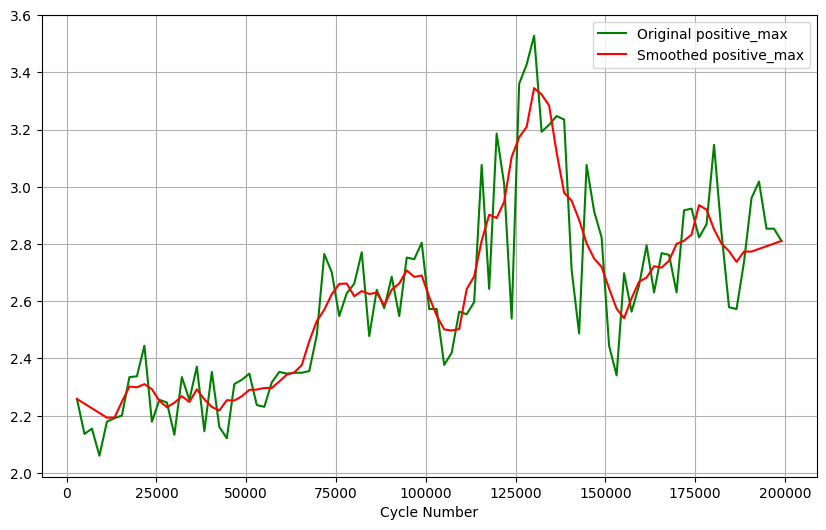

In [12]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on position and velocity, and plot
df = combined_df[combined_df['velocity'] == 270]
plt.figure(figsize=(10, 6))
plt.plot(df['Cycle_Number'], df['positive_max'], label='Original positive_max', color='green')
plt.plot(df['Cycle_Number'], df['smoothed_positive_max'], label='Smoothed positive_max', color='red')
plt.xlabel("Cycle Number")
plt.legend()
plt.grid()
plt.show()

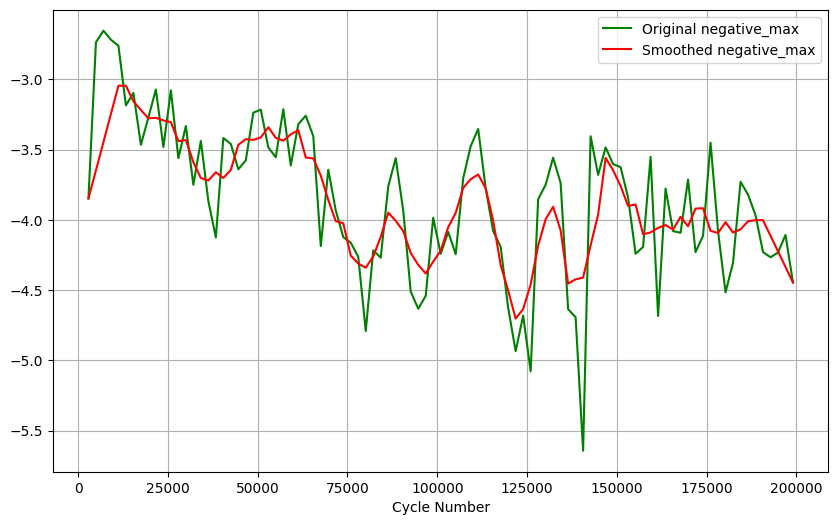

In [13]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on position and velocity, and plot
df = combined_df[combined_df['velocity'] == 270]
plt.figure(figsize=(10, 6))
plt.plot(df['Cycle_Number'], df['negative_max'], label='Original negative_max', color='green')
plt.plot(df['Cycle_Number'], df['smoothed_negative_max'], label='Smoothed negative_max', color='red')
plt.xlabel("Cycle Number")
plt.legend()
plt.grid()
plt.show()

# Random Forest

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

X = combined_df[['velocity', 'Cycle_Number']]
y = combined_df['smoothed_negative_max']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the model and hyperparameters to tune
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['auto', 'sqrt']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))
mean_val_score = np.mean(val_scores)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")


from sklearn.metrics import r2_score

y_pred_val = best_model.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Us

Best Model Parameters: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Validation Score (cross-validated): 0.3199
Test Score: 0.8112
R2 Score on Validation Set: 0.9994
R2 Score on Test Set: 0.9960


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
import numpy as np

X = combined_df[['velocity', 'Cycle_Number']]
y = combined_df['smoothed_positive_max']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the model and hyperparameters to tune
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 16],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'max_features': ['auto', 'sqrt']
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring=make_scorer(custom_scorer),
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))
mean_val_score = np.mean(val_scores)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")


from sklearn.metrics import r2_score

y_pred_val = best_model.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
157 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\U

Best Model Parameters: {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Validation Score (cross-validated): 0.5710
Test Score: 0.9088
R2 Score on Validation Set: 0.9996
R2 Score on Test Set: 0.9976


# Light GBM

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import lightgbm as lgb
import numpy as np

# Define features and target
X = combined_df[['velocity', 'Cycle_Number']]
y = combined_df['smoothed_positive_max']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the LightGBM model and hyperparameters to tune
model = lgb.LGBMRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10],  # -1 means no limit for max_depth
    'learning_rate': [0.2],
    'num_leaves': [31],
    'subsample': [0.4, 0.6],
    'colsample_bytree': [1.0, 1.2]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model_lgb = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model_lgb, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model_lgb.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model_lgb.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")

from sklearn.metrics import r2_score

y_pred_val = best_model.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\lightgbm\sklearn.py", line 1189, in fit
    super().fit(
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\lightgbm\sklearn.py", line 955, in fit
    self._Booster = train(
  File "c:\Users\alira\anaconda3\envs\FYP\lib\si

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 2
[LightGBM] [Info] Start training from score 3.874673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import lightgbm as lgb
import numpy as np

# Define features and target
X = combined_df[['velocity', 'Cycle_Number']]
y = combined_df['smoothed_negative_max']

# Splitting data into train/validation/test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
# This results in 60% train, 20% validation, and 20% test splits

# Custom scoring function
def custom_scorer(y_true, y_pred):
    # Using the inverse of MAE as the scoring metric
    score = 1 - mean_absolute_error(y_true, y_pred)
    return score

# Define the LightGBM model and hyperparameters to tune
model = lgb.LGBMRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10],  # -1 means no limit for max_depth
    'learning_rate': [0.2],
    'num_leaves': [31],
    'subsample': [0.4, 0.6],
    'colsample_bytree': [1.0, 1.2]
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Train the model with the best parameters using cross-validation on the train set
grid_search.fit(X_train, y_train)
best_model_lgb = grid_search.best_estimator_

# Cross-validate on the validation set with the selected best model for an unbiased evaluation
val_scores = cross_val_score(best_model_lgb, X_val, y_val, cv=5, scoring=make_scorer(custom_scorer))

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Validation Score (cross-validated): {mean_val_score:.4f}")

# Evaluate on the test set
best_model_lgb.fit(X_train_val, y_train_val)  # Train on full train/validation data
y_test_pred = best_model_lgb.predict(X_test)
test_score = custom_scorer(y_test, y_test_pred)

print(f"Test Score: {test_score:.4f}")

from sklearn.metrics import r2_score

y_pred_val = best_model.predict(X_val)
r2_val = r2_score(y_val, y_pred_val)

y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Score on Validation Set: {r2_val:.4f}')
print(f'R2 Score on Test Set: {r2_test:.4f}')


Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\lightgbm\sklearn.py", line 1189, in fit
    super().fit(
  File "c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\lightgbm\sklearn.py", line 955, in fit
    self._Booster = train(
  File "c:\Users\alira\anaconda3\envs\FYP\lib\si

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 382, number of used features: 2
[LightGBM] [Info] Start training from score -6.192173
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be